In [11]:
from __future__ import print_function
from fenics import *
from mshr import *
import numpy as np

%matplotlib inline

In [12]:
# Create mesh

nx = 12
ny = 12
nz = 12

mesh = UnitCubeMesh(nx,ny,nz) # 10 is number of intervals Omega is divided into

In [13]:
xdmffile_p1 = XDMFFile(mesh.mpi_comm(), 'three_comp_results/p1.xdmf')
xdmffile_p2 = XDMFFile(mesh.mpi_comm(), 'three_comp_results/p2.xdmf')
xdmffile_p3 = XDMFFile(mesh.mpi_comm(), 'three_comp_results/p3.xdmf')



xml_mesh = File('three_comp_results/mesh.xml')
xml_mesh << mesh

In [14]:
# Define function spaces. Define trial and test functions

el = tetrahedron

P = FiniteElement('P',el,2)


element = MixedElement([P,P,P])
FS = FunctionSpace(mesh,element)


# Define test functions
q1,q2,q3 = TestFunctions(FS)


# Define boundaries
inflow   = 'near(x[0], 0)'
outflow  = 'near(x[2], 1)'


# Define inflow profile
inflow_profile = ('2*pi*sin(2*pi*x[1])')

bcp_inflow = DirichletBC(FS.sub(0), Expression(inflow_profile, degree=2), inflow)
bcp_outflow = DirichletBC(FS.sub(2), Constant(0), outflow)
bcs = [bcp_inflow,bcp_outflow]


K1 = Constant(0.5)
K2 = Constant(0.4)
K3 = Constant(0.3)


f = Constant(0)
s = Constant(0)

beta12 = Constant(0.8)
beta23 = Constant(0.8)


p = Function(FS)
p1, p2,p3 = split(p)



F = -K1 * dot(grad(p1), grad(q1))*dx + -K2 * dot(grad(p2), grad(q2))*dx + -K3 * dot(grad(p3), grad(q3))*dx \
    + dot(beta12*(p1-p2),q1)*dx + dot(beta12*(p2-p1),q2)*dx + dot(beta23*(p2-p3),q2)*dx + dot(beta23*(p3-p2),q3)*dx
    


In [15]:
solve(F==0, p, bcs)

In [16]:
p1,p2,p3 = p.split()

xdmffile_p1.write_checkpoint(p1, 'p1')
xdmffile_p2.write_checkpoint(p2, 'p2')
xdmffile_p3.write_checkpoint(p3, 'p3')



xdmffile_p1.close()
xdmffile_p2.close()
xdmffile_p3.close()

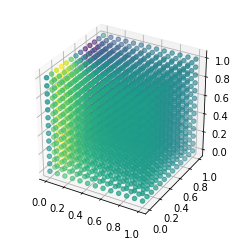

In [17]:
plot(p1)

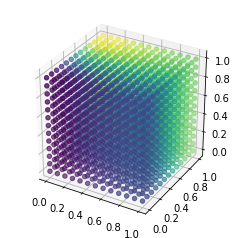

In [18]:
plot(p2)

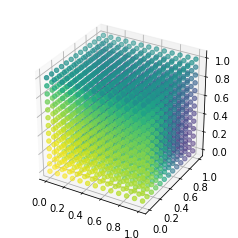

In [19]:
plot(p3)